# Assignment 1: k-nearest neighbors (100 points)

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

==> *Write*
* *names* 
* *matr. nr.* 
* *study program*
* *B.Sc./M.Sc.*

*of all assignment group participants here.* (double klick here to edit)*

In [2]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np


def load_wine_dataset():
    from sklearn import datasets
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    return X, y
    
X, y = load_wine_dataset()


## Task 1: Visualization and Preprocessing (25 points)

1) *(5 Points)* Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: [http://archive.ics.uci.edu/ml/datasets/Wine).


==> *Write your response here.* (double klick here to edit)



```
# This is formatted as code
```

2) *(5 Points)* Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [3]:
# Implement your solution here.
print(y.shape[0])
print("Samples per class: {}".format(np.bincount(y)))
means = X.mean(axis=0)
stds = X.std(axis=0)
print("(Mean, Std): {}".format(list(zip(means, stds))))

178
Samples per class: [59 71 48]
(Mean, Std): [(13.000617977528083, 0.809542914528517), (2.336348314606741, 1.1140036269797895), (2.3665168539325854, 0.2735722944264325), (19.49494382022472, 3.330169757658213), (99.74157303370787, 14.242307673359807), (2.295112359550562, 0.6240905641965366), (2.0292696629213474, 0.9960489503792328), (0.36185393258426973, 0.12410325988364797), (1.5908988764044953, 0.5707488486199377), (5.058089882022473, 2.3117646609525573), (0.9574494382022468, 0.2279286065650725), (2.6116853932584254, 0.7079932646716006), (746.8932584269663, 314.0216568419877)]


3) *(5 Points)* Visualize the variables *alcohol* and *magnesium* in a scatter plot (*alcohol* on the x-axis, *magnesium* on the y-axis). Color each point of the plot according to its class.

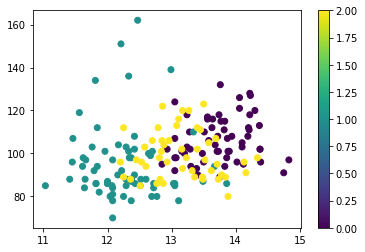

In [4]:
plt.scatter(X[:, 0], X[:, 4], c=y)
plt.colorbar()


4) *(5 Points)* Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [5]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """

    indexes = np.arange(X.shape[0])
    np.random.shuffle(indexes)
    train_indexes = indexes[:int(X.shape[0]*0.7)]
    test_indexes = indexes[int(X.shape[0]*0.7):]

    return X[train_indexes], X[test_indexes], y[train_indexes], y[test_indexes]

X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

In [6]:
def min_max_scaler(data, inplace=False):
  mins = data.min(axis=0)
  maxs = data.max(axis=0)
  diffs = maxs - mins
  if inplace:
    data -= mins[np.newaxis, :]
    data /= diffs[np.newaxis, :]
    return
  return (data-mins[np.newaxis, :])/diffs[np.newaxis, :]

5) *(5 Points)* kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [36]:
min_max_scaler(X_train, True)
min_max_scaler(X_test, True)

In [37]:
X_train.mean(axis=0), X.std(axis=0)

(array([0.49191134, 0.3273301 , 0.45012733, 0.43782518, 0.41351099,
        0.46212458, 0.47189774, 0.46032258, 0.37356263, 0.31273993,
        0.45001772, 0.4782583 , 0.34815502]),
 array([8.09542915e-01, 1.11400363e+00, 2.73572294e-01, 3.33016976e+00,
        1.42423077e+01, 6.24090564e-01, 9.96048950e-01, 1.24103260e-01,
        5.70748849e-01, 2.31176466e+00, 2.27928607e-01, 7.07993265e-01,
        3.14021657e+02]))

array([0.49191134, 0.3273301 , 0.45012733, 0.43782518, 0.41351099,
       0.46212458, 0.47189774, 0.46032258, 0.37356263, 0.31273993,
       0.45001772, 0.4782583 , 0.34815502])

## Task 2: k-nearest neighbors (50 Points)
*Choose classes randomly if weights are equal for multiple classes*

**For B.Sc. Data Science:**  

Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighbors`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `weights`, which is provided as a field in the kNN class.

**For all students other than B.Sc. Data Science:**

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [24]:
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def calculate_distances(self, X_input, dist_func):
      distances = np.zeros((X_input.shape[0], self.X.shape[0]), np.float32)
      for i in range(X_input.shape[0]):
        for j in range(self.X.shape[0]):
          distances[i, j] = dist_func(X_input[i], self.X[j])
      return distances  

    def get_neighbors(self, distances):
      k_neighbors_indexes = np.argsort(distances)[:self.k]
      return distances[k_neighbors_indexes], self.y[k_neighbors_indexes]   

    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        # Implement your solution here.

        weight_func = None
        if self.weights == 'uniform':
          weight_func = uniform_weights
        elif self.weights == 'distance':
          weight_func = distance_weights
        else:
          raise NotImplementedError("Not supported weights")
        

        distances = self.calculate_distances(X, euclidean_distance) #(n, N)
        predicts = np.zeros((X.shape[0], ), np.int) # (n, )
        for i in range(X.shape[0]):
          current_distances, current_labels = self.get_neighbors(distances[i])
          weights = weight_func(current_labels, current_distances).sum(axis=0)
          predicts[i] = np.argmax(weights)
        
        return predicts
          


def uniform_weights(labels, distances):
  weights = np.zeros((labels.shape[0], 3), np.float32)
  indexes = np.arange(labels.shape[0])
  weights[indexes, labels] = 1

  return weights


def K(x):
  return 1/x


def distance_weights(labels, distances):
  weights = uniform_weights(labels, distances)
  weights *= K(distances[:, np.newaxis])

  return weights

  

def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

In [25]:
labels = np.array([0, 1, 1, 2])
distances = np.array([12.4, 10, 8.1, 2])
weights = distance_weights(labels, distances)

In [26]:
weights

array([[0.08064516, 0.        , 0.        ],
       [0.        , 0.1       , 0.        ],
       [0.        , 0.12345679, 0.        ],
       [0.        , 0.        , 0.5       ]], dtype=float32)

In [27]:
distances[:, np.newaxis]

array([[12.4],
       [10. ],
       [ 8.1],
       [ 2. ]])


## Task 3: Evaluation (25 Points)

1) *(10 Points)* Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score. It is advisable to implement a function for the confusion matrix and reuse it.

In [28]:
def confusion_matrix(y_pred, y_true):
  M = np.zeros((3, 3))
  for i in range(y_pred.shape[0]):
    M[y_pred[i], y_true[i]] += 1
  return M


def precision(y_pred, y_true):
  M = confusion_matrix(y_pred, y_true)
  return (np.diag(M)/M.sum(axis=0)).mean()


def recall(y_pred, y_true):
    # Implement your solution here.
    M = confusion_matrix(y_pred, y_true)
    return (np.diag(M)/M.sum(axis=1)).mean()

def f1score(y_pred, y_true):
  p = precision(y_pred, y_true)
  r = recall(y_pred, y_true)
  return 2*(p*r)/(p+r)

2) *(10 Points)* Evaluate the performance of kNN with uniform weighting on the Wine dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

**For all students other than B.Sc. Data Science:** 

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


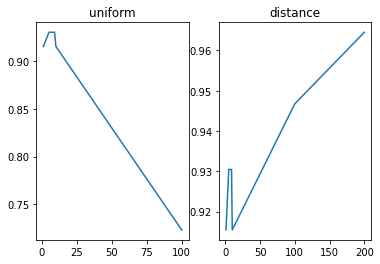

In [30]:
ks = [1, 5, 9, 10, 100, 200]
figure, axis = plt.subplots(1, 2)
for i,w in enumerate(['uniform', 'distance']):
  f1s = []
  for k in ks:
    knn = KNearestNeighbors(k, w)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1s.append(f1score(y_pred, y_test))
  axis[i].plot(ks, f1s)
  axis[i].set_title(w)
plt.show()

array([0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0,
       2, 1, 0, 1, 1, 2, 1, 2, 0, 0])

==> *Write your observations here and report your results.* (double klick here to edit)

**3**) *(5 Points)* Explain why kNN with `k=1` achieves perfect results on the training data. Why is it not the best model?

==> *Write your response here.* (double klick here to edit)